Logistic Regression
- Predict the value of a numeric categorical variable based on its relationship with predictor variables

Use Cases
- Purchase propensity vs. ad spend analysis
- Customer churn prediction
- Employee attrition modeling

Assumptions
- Data is free of missing values
- The predictant variable is binary or ordinal
- All predictors are independent of each other
- There are at least 50 observations per predictor variable

## Logistic Regression

In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

### Logistic Regression on mtcars

In [4]:
cars = pd.read_csv("mtcars.csv")
cars.head()

#am -- automatic or manual transmission

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [16]:
#check if meet assumptions

#indexer
cars_data = cars.iloc[:,[5,11]].values
cars_data_names = ['drat','carb']

#am variable -- get values
y = cars.iloc[:,9].values

<AxesSubplot:xlabel='drat', ylabel='carb'>

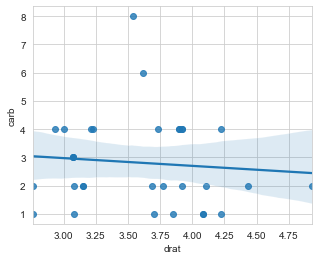

In [17]:
#Checking for independence between features
sb.regplot(x='drat',y='carb',data=cars,scatter=True)

#categorical values -- no infinite number of positions

In [19]:
#are they independent?
drat = cars.drat
carb = cars.carb

spearmanr_coefficient,p_value = spearmanr(drat,carb)
print ('Spearmanr Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))
#very low correlation -- can be used

Spearmanr Rank Correlation Coefficient -0.125


In [20]:
#Check for missing values -- isnull and sum to get counts
cars.isnull().sum()

#0 missing values

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

<AxesSubplot:xlabel='am', ylabel='count'>

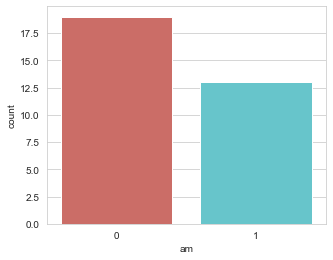

In [21]:
#is target variable binary or ordinal?
sb.countplot(x='am',data=cars,palette='hls')

#binary -- only assumes 2 values

In [22]:
#dataset size is sufficient
cars.info()

#only 31 records -- pretty small dataset, keep in mind

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [23]:
#deploying and evaluating your model
X = scale(cars_data)

In [26]:
LogReg = LogisticRegression()


#pass in dataset and target variable, y
LogReg.fit(X,y)

print(LogReg.score(X,y)) #0.8125 not bad!

0.8125


In [27]:
#scikit learn metrics -- evaluate model
y_pred = LogReg.predict(X)
from sklearn.metrics import classification_report

print(classification_report(y,y_pred)) #target and predicted values for target

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.73      0.85      0.79        13

    accuracy                           0.81        32
   macro avg       0.81      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32



## Matplotlib

In [32]:
#usage guide
import matplotlib.pyplot as plt
import numpy as np
import pandas

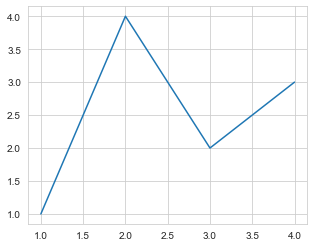

In [33]:
#creating a figure with axes
fig,ax = plt.subplots() #single axis
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

- A figure can contain any number of axes but will typically have at least one

<Figure size 360x288 with 0 Axes>

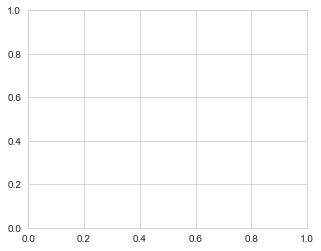

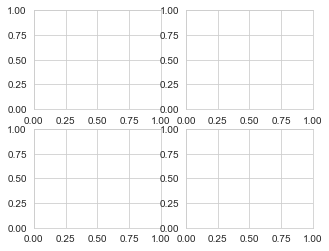

In [34]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

In [35]:
#all of plotting functions expect numpy.array or numpy.ma.masked_array as input
#best to convert to numpy.array objects prior to plotting

#converting a Pandas dataframe
a = pandas.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
a_asarray = a.values

#convert a numpy.matrix
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

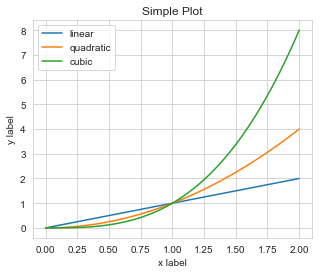

In [36]:
#OO-style
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

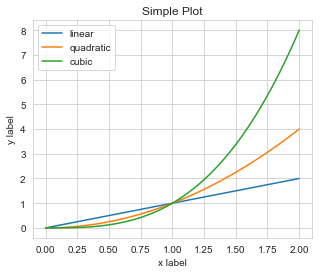

In [37]:
#py-plot style
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

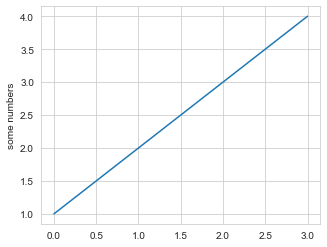

In [38]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

#if you provide a single list or array to plot, 
#matplotlib assumes it is a sequence of y values and automatically generates
#x values for you

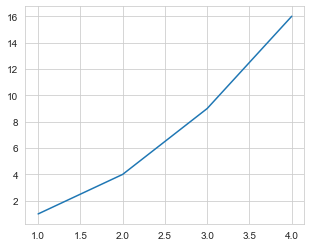

In [39]:
#plotting x vs. y
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

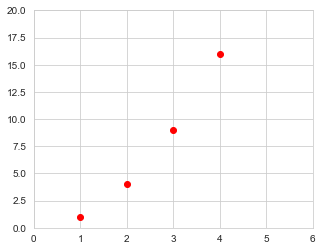

In [40]:
#adding red circles -- 'ro'
#default is 'b-' which is a solid blue line
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

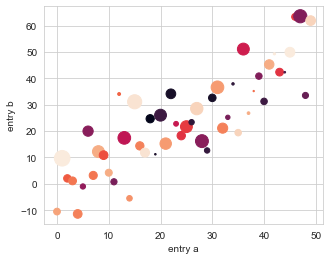

In [41]:
#Plotting with keyword strings
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

#have data in a format that lets you access particular variables with strings
#data keyword argument

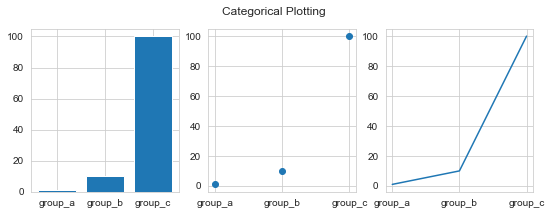

In [42]:
#Plotting with categorical variables
#can be passed directly to many plotting functions
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

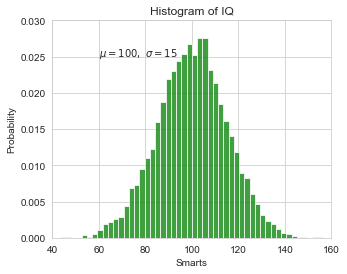

In [43]:
#Working with text
#text -- adding text in an arbitrary location
#xlabel, ylabel and title
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
#TeX expression surrounded by dollar signs for mathematical expressions
#r preceding the title string is important -- string is a raw string
#won't treat backlashes as python escapes
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

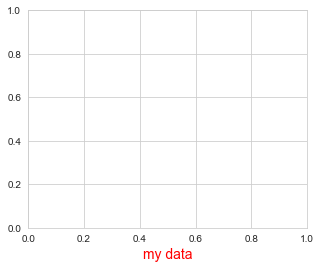

In [44]:
t = plt.xlabel('my data', fontsize=14, color='red')

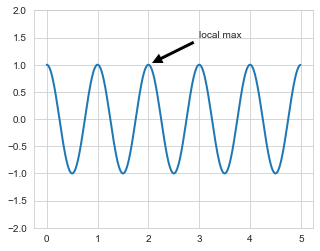

In [45]:
#Annotating text -- annotate method
#two points to consider, the location being annotated (xy) and the location of the text
#both arguments are (x,y) tuples
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

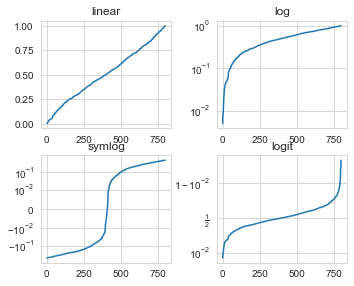

In [46]:
#Logarithmic and other nonlinear axes
#can have logarithmic and logit scales
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

In [47]:
#Legend entries
handles, labels = ax.get_legend_handles_labels()
#Returns a list of handles/artists which exist on the Axes which can be used
#to generate entries for the resulting legend
ax.legend(handles, labels)

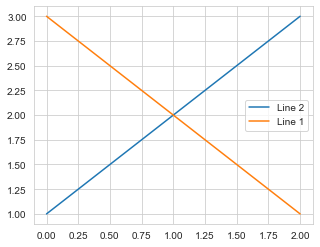

In [48]:
line_up, = plt.plot([1, 2, 3], label='Line 2')
line_down, = plt.plot([3, 2, 1], label='Line 1')
plt.legend(handles=[line_up, line_down])

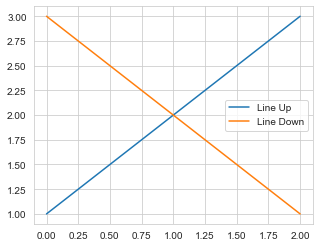

In [49]:
line_up, = plt.plot([1, 2, 3], label='Line 2')
line_down, = plt.plot([3, 2, 1], label='Line 1')
plt.legend([line_up, line_down], ['Line Up', 'Line Down'])

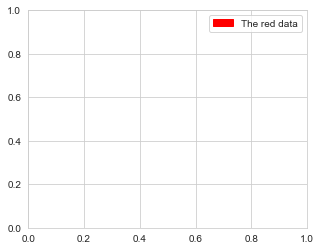

In [50]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

#Creating legend which has an entry for some data which is represented by a red color
red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])

plt.show()

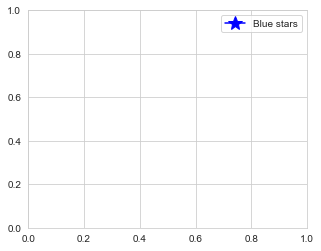

In [51]:
#can also create a line with a marker as a legend handle
import matplotlib.lines as mlines

blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Blue stars')
plt.legend(handles=[blue_line])

plt.show()

No handles with labels found to put in legend.


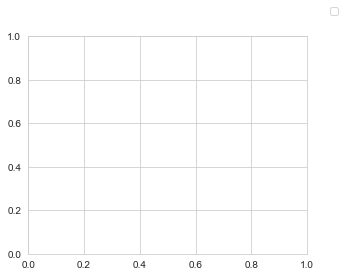

In [52]:
#legend location
#bbox_to_anchor keyword gives a great degree of control for manual legend placement
#specify corner location and coordinate systme
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

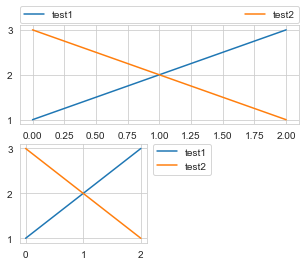

In [53]:
plt.subplot(211)
plt.plot([1, 2, 3], label="test1")
plt.plot([3, 2, 1], label="test2")

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1, 2, 3], label="test1")
plt.plot([3, 2, 1], label="test2")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

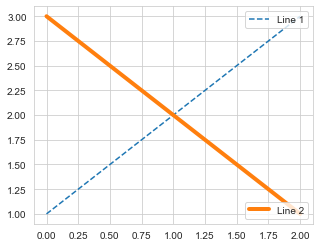

In [54]:
#multiple legends on the same axes
line1, = plt.plot([1, 2, 3], label="Line 1", linestyle='--')
line2, = plt.plot([3, 2, 1], label="Line 2", linewidth=4)

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc='upper right')

# Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc='lower right')

plt.show()

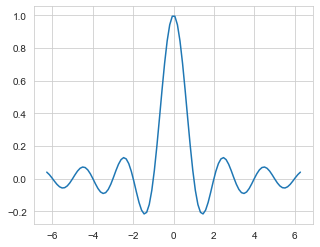

In [55]:
#Autoscaling
#autoscaling extends the axis limits 5% beyond the data limits
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sinc(x)

fig, ax = plt.subplots()
ax.plot(x, y)



In [56]:
#The default margin around the data limits is 5%
ax.margins()

#margins can also be made larger --> ax.margins(0.2,0.2)

(0.05, 0.05)

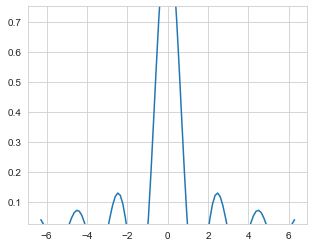

In [57]:
#negative margins set the axes limits to a subrange of the data range--> clip data
#single number affects both axes
fig, ax = plt.subplots()
ax.plot(x, y)
ax.margins(y=-0.2)

Text(0.5, 1.0, 'margins(0.2)')

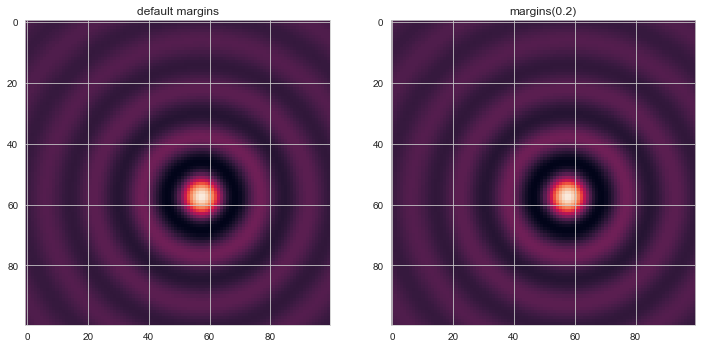

In [58]:
#sticky edges -- without margins
xx, yy = np.meshgrid(x, x)
zz = np.sinc(np.sqrt((xx - 1)**2 + (yy - 1)**2))

fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].imshow(zz)
ax[0].set_title("default margins")
ax[1].imshow(zz)
ax[1].margins(0.2)
ax[1].set_title("margins(0.2)")

#override of margins is determined by "sticky edges"
#effect can be disabled by changing use_sticky_edges

Text(0.5, 1.0, 'default use_sticky_edges\nmargins(-0.2)')

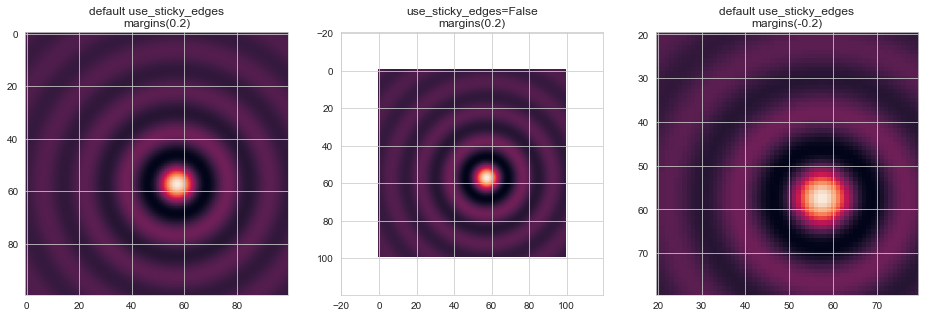

In [59]:
#overriding sticky edges
fig, ax = plt.subplots(ncols=3, figsize=(16, 10))
ax[0].imshow(zz)
ax[0].margins(0.2)
ax[0].set_title("default use_sticky_edges\nmargins(0.2)")
ax[1].imshow(zz)
ax[1].margins(0.2)
ax[1].use_sticky_edges = False
ax[1].set_title("use_sticky_edges=False\nmargins(0.2)")
ax[2].imshow(zz)
ax[2].margins(-0.2)
ax[2].set_title("default use_sticky_edges\nmargins(-0.2)")

Text(0.5, 1.0, 'Two curves')

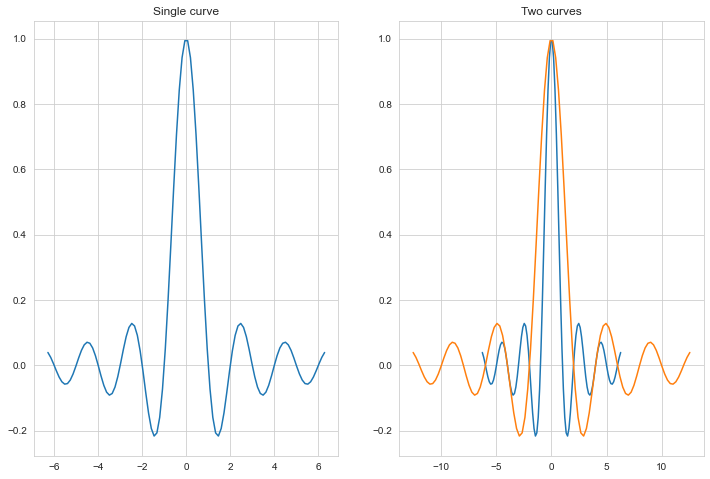

In [60]:
#limits are recalculated every time you add a new curve to the plot
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].plot(x, y)
ax[0].set_title("Single curve")
ax[1].plot(x, y)
ax[1].plot(x * 2.0, y)
ax[1].set_title("Two curves")

Text(0.5, 1.0, 'set_xlim(left=-1, right=1)\nautoscale()')

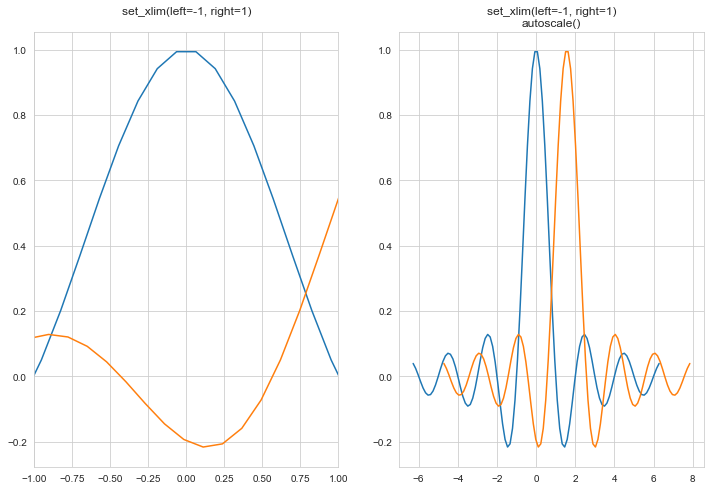

In [61]:
#can disable autoscaling to manually set the axis limit
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].plot(x, y)
ax[0].set_xlim(left=-1, right=1)
ax[0].plot(x + np.pi * 0.5, y)
ax[0].set_title("set_xlim(left=-1, right=1)\n")
ax[1].plot(x, y)
ax[1].set_xlim(left=-1, right=1)
ax[1].plot(x + np.pi * 0.5, y)
#recalculating the new limits --> toggle manually
ax[1].autoscale()
ax[1].set_title("set_xlim(left=-1, right=1)\nautoscale()")

In [62]:
print(ax[0].get_autoscale_on())  # False means disabled
print(ax[1].get_autoscale_on())  # True means enabled -> recalculated

False
True


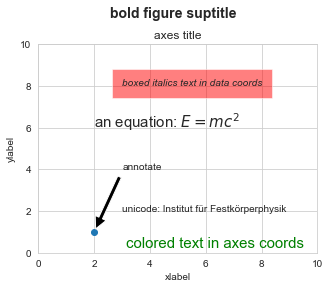

In [63]:
#Text functions
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 10])

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

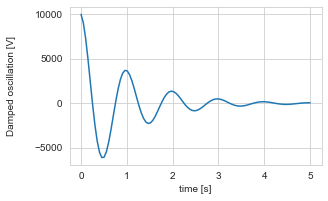

In [64]:
#can move labels with the labelpad keyword argument
x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)


fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1*10000)
ax.set_xlabel('time [s]')
ax.set_ylabel('Damped oscillation [V]', labelpad=18)

plt.show()

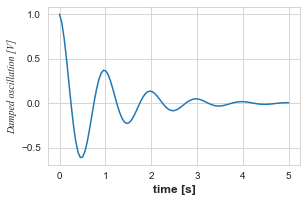

In [65]:
#can change font
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('italic')

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.set_xlabel('time [s]', fontsize='large', fontweight='bold')
ax.set_ylabel('Damped oscillation [V]', fontproperties=font)

plt.show()

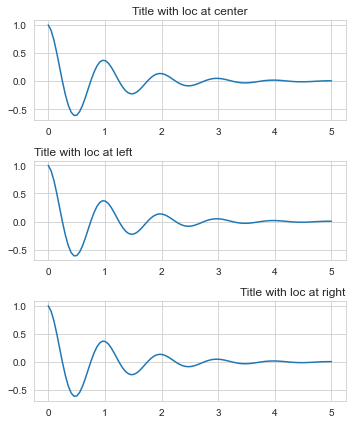

In [66]:
#title location
fig, axs = plt.subplots(3, 1, figsize=(5, 6), tight_layout=True)
locs = ['center', 'left', 'right']
for ax, loc in zip(axs, locs):
    ax.plot(x1, y1)
    ax.set_title('Title with loc at '+loc, loc=loc)
plt.show()

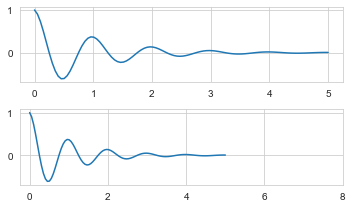

In [67]:
#tick labels
#can override the default locators and formatters but discouraged
#breaks interactive navigation of the plot
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
axs[1].xaxis.set_ticks(np.arange(0., 8.1, 2.))
plt.show()

In [68]:
#annotations
#text with box
#bbox keyword argument -- draws a box around the text
t = ax.text(
    0, 0, "Direction", ha="center", va="center", rotation=45, size=15,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2))

In [69]:
bb = t.get_bbox_patch()

In [70]:
#sets the box shape
bb.set_boxstyle("rarrow", pad=0.6)

In [72]:
#draw only an arrow by using empty string as the first argument
ax.annotate("",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

Text(0.8, 0.8, '')

In [73]:
#Getting colormaps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 8)

In [74]:
#returns a RGBA value from the colormap
print(viridis(0.56))

(0.122312, 0.633153, 0.530398, 1.0)


In [75]:
#ListedColormap
#Stores their color values in a .colors attribute -- colors properly
print('viridis.colors', viridis.colors)
print('viridis(range(8))', viridis(range(8)))
print('viridis(np.linspace(0, 1, 8))', viridis(np.linspace(0, 1, 8)))

#LinearSegementedColormap does not have a .colors attribute -- can call with an integer array

viridis.colors [[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis(range(8)) [[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis(np.linspace(0, 1, 8)) [[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]

In [76]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

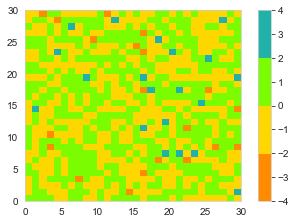

In [77]:
#type in a list of color names to create a colormap
cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
plot_examples([cmap])

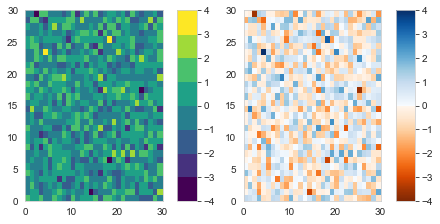

In [78]:
#concatenate two colormaps
top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
plot_examples([viridis, newcmp])